In [62]:
import pandas as pd # for dataframes
import numpy as np
import matplotlib.pyplot as plt # for simple plots
from sklearn.preprocessing import StandardScaler
import phik
from phik.report import plot_correlation_matrix
from phik import report
import seaborn as sns # for slightly more complicated plots
import numpy as np # for numerical computing and linear algebra data structur
from numba import jit # for JIT compilation facilties for improved efficiency

#### Data Ingestion

DATA DESCRIPTION:<br>
Input features:<br>
Objective: factual information;<br>
Examination: results of medical examination;<br>
Subjective: information given by the patient.<br>

Features:<br>
Age | Objective Feature | age | int (days)<br>
Height | Objective Feature | height | int (cm) |<br>
Weight | Objective Feature | weight | float (kg) |<br>
Gender | Objective Feature | gender | categorical code | 1 - women, 2 - men |<br>
Systolic blood pressure | Examination Feature | ap_hi | int |<br>
Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
Smoking | Subjective Feature | smoke | binary | 1-Yes, 0-No<br>
Alcohol intake | Subjective Feature | alco | binary | 1-Yes, 0-No<br>
Physical activity | Subjective Feature | active | binary | 1-Yes, 0-No<br>
Presence or absence of cardiovascular disease | Target Variable | cardio | binary | 1-Yes, 0-No” <br>


In [63]:
#Reading in the data and storing it into a pandas dataframe
df = pd.read_csv('cardio_train 3.csv',sep=';') 

#### Data Pre-Processing

In [64]:
#display first 20 rows
df.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


#### Checking for duplicate ids in the dataset

In [65]:
df['id'].value_counts() 
#no duplicates found hence keep all rows

0        1
66623    1
66631    1
66630    1
66628    1
        ..
33338    1
33339    1
33340    1
33341    1
99999    1
Name: id, Length: 70000, dtype: int64

Converting age from number of days to year

In [66]:
df['age'] = (df['age'] / 365.25).astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


#### Data Observation

In [67]:
df.info()
#The data is in an appropriate format and contains all its values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int32  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int32(1), int64(11)
memory usage: 6.7 MB


#### Data imputation to preserve statistical power, avoid bias as much as possible.

In [68]:
def produce_missing_report(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({
                                     'percent_missing': percent_missing})
    return missing_value_df

produce_missing_report(df) #Confirmed no data missing from the rows

,percent_missing
id,0.0
age,0.0
gender,0.0
height,0.0
weight,0.0
ap_hi,0.0
ap_lo,0.0
cholesterol,0.0
gluc,0.0
smoke,0.0


#### Data Standardization to ensure that all features have a similar scale and variance.

In [69]:
def standardize_col(col):
    scaler = StandardScaler()
    std_col = scaler.fit_transform(col.values.reshape(-1, 1))
    return std_col

standardize_col(df['age'])
standardize_col(df['height'])
standardize_col(df['weight'])
standardize_col(df['ap_hi'])
standardize_col(df['ap_lo'])
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


#### Outlier Detection analysis on the age, height, weight, ap_hi, and ap_lo columns, since they are continuous numerical variables that may have outliers.

Performing outlier detection on the age column

In [70]:
df['age'].describe()

count    70000.000000
mean        52.803257
std          6.762462
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: age, dtype: float64

In [71]:
Q1 = df['age'].quantile(0.25)
print("Q1 ", Q1)
Q3 = df['age'].quantile(0.75)
print("Q3 ", Q3)
IQR = Q3 - Q1
print("IQR", IQR)

Q1  48.0
Q3  58.0
IQR 10.0


In [72]:
upper_bound = Q3 + 1.5 * IQR
print("upper ", upper_bound)
lower_bound = Q1 - 1.5 * IQR
print("lower ", lower_bound)

upper  73.0
lower  33.0


In [73]:
df_without_outliers = df[(df['age'] < upper_bound) & (df['age'] > lower_bound)]
df_without_outliers

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1c31df1a6e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c31df1ac80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c31df1a410>],
 'medians': [<matplotlib.lines.Line2D at 0x1c31df1b220>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c31df1b4f0>],
 'means': []}

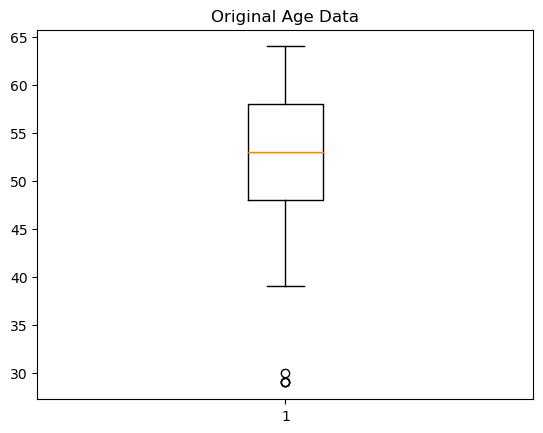

In [74]:
fig1, ax1 = plt.subplots()
ax1.set_title('Original Age Data')
ax1.boxplot(df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c31df60970>,
 'caps': [<matplotlib.lines.Line2D at 0x1c31df60f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c31df606a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c31df614b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c31df61780>],
 'means': []}

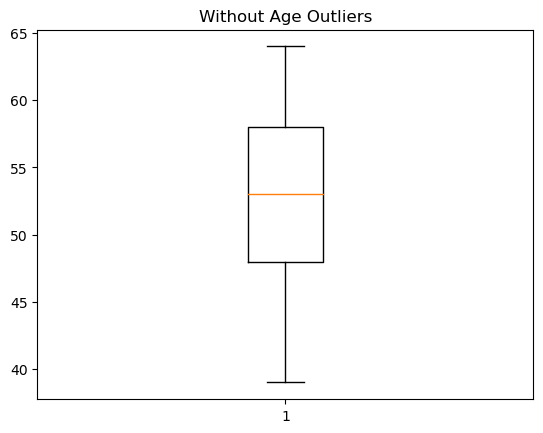

In [75]:
fig1, ax1 = plt.subplots()
ax1.set_title('Without Age Outliers')
ax1.boxplot(df_without_outliers['age'])

In [76]:
df_without_outliers = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)].reset_index(drop=True)
df = df_without_outliers
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69991,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69992,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69993,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69994,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


Performing outlier detection on the height column

In [77]:
df['height'].describe() # uncertain of if this is needed, people have varied height doesnt mean it contributes to CVD. however the column continuous. do correlation matrix to see the relevance

count    69996.000000
mean       164.359063
std          8.210122
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [79]:
Q1 = df['height'].quantile(0.25)
print("Q1 ", Q1)
Q3 = df['height'].quantile(0.75)
print("Q3 ", Q3)
IQR = Q3 - Q1
print("IQR", IQR)

Q1  159.0
Q3  170.0
IQR 11.0


In [80]:
upper_bound = Q3 + 1.5 * IQR
print("upper ", upper_bound)
lower_bound = Q1 - 1.5 * IQR
print("lower ", lower_bound)

upper  186.5
lower  142.5


In [81]:
df_without_outliers = df[(df['height'] < upper_bound) & (df['height'] > lower_bound)]
df_without_outliers

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69991,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69992,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69993,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69994,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1c31dfad930>,
 'caps': [<matplotlib.lines.Line2D at 0x1c31dfaded0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c31dfad660>],
 'medians': [<matplotlib.lines.Line2D at 0x1c31dfae470>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c31dfae740>],
 'means': []}

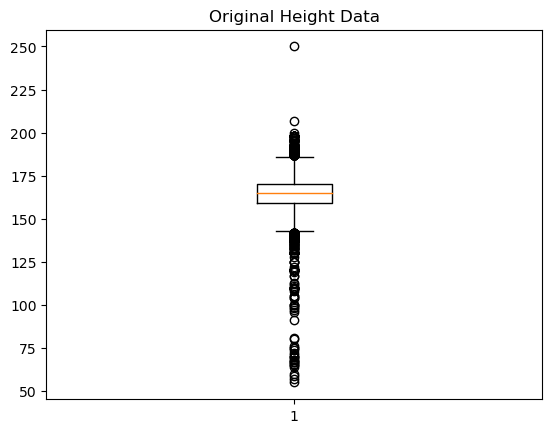

In [82]:
fig1, ax1 = plt.subplots()
ax1.set_title('Original Height Data')
ax1.boxplot(df['height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c31f7e4340>,
 'caps': [<matplotlib.lines.Line2D at 0x1c31f7e48e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c31f7e4070>],
 'medians': [<matplotlib.lines.Line2D at 0x1c31f7e4e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c31f7e5150>],
 'means': []}

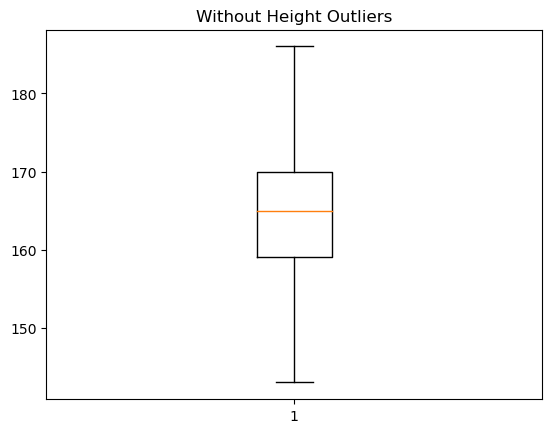

In [83]:
fig1, ax1 = plt.subplots()
ax1.set_title('Without Height Outliers')
ax1.boxplot(df_without_outliers['height'])

In [84]:
df_without_outliers = df[(df['height'] > lower_bound) & (df['height'] < upper_bound)].reset_index(drop=True)
df = df_without_outliers
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69472,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69473,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69474,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69475,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


Performing outlier detection on the weight column

In [23]:
df['weight'].describe()

count    18.000000
mean     67.144444
std       7.145482
min      57.000000
25%      61.000000
50%      68.000000
75%      71.750000
max      81.000000
Name: weight, dtype: float64

In [85]:
Q1 = df['weight'].quantile(0.25)
print("Q1 ", Q1)
Q3 = df['weight'].quantile(0.75)
print("Q3 ", Q3)
IQR = Q3 - Q1
print("IQR", IQR)

Q1  65.0
Q3  82.0
IQR 17.0


In [86]:
upper_bound = Q3 + 1.5 * IQR
print("upper ", upper_bound)
lower_bound = Q1 - 1.5 * IQR
print("lower ", lower_bound)

upper  107.5
lower  39.5


In [87]:
df_without_outliers = df[(df['weight'] < upper_bound) & (df['weight'] > lower_bound)]
df_without_outliers

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69471,99992,57,1,165,80.0,150,80,1,1,0,0,1,1
69472,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69474,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69475,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1c31f839480>,
 'caps': [<matplotlib.lines.Line2D at 0x1c31f839a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c31f8391b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c31f839fc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c31f83a290>],
 'means': []}

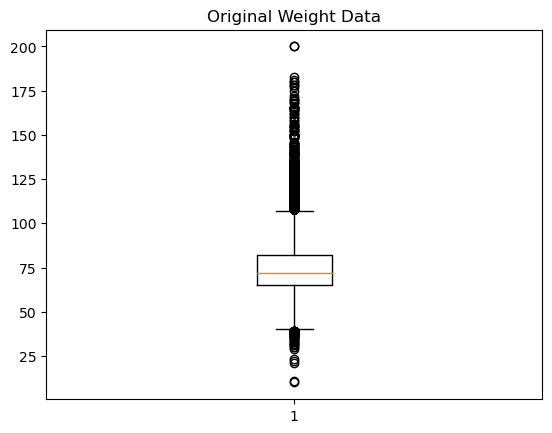

In [88]:
fig1, ax1 = plt.subplots()
ax1.set_title('Original Weight Data')
ax1.boxplot(df['weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c31f887940>,
 'caps': [<matplotlib.lines.Line2D at 0x1c31f887ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c31f887670>],
 'medians': [<matplotlib.lines.Line2D at 0x1c31f8b44c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c31f8b4790>],
 'means': []}

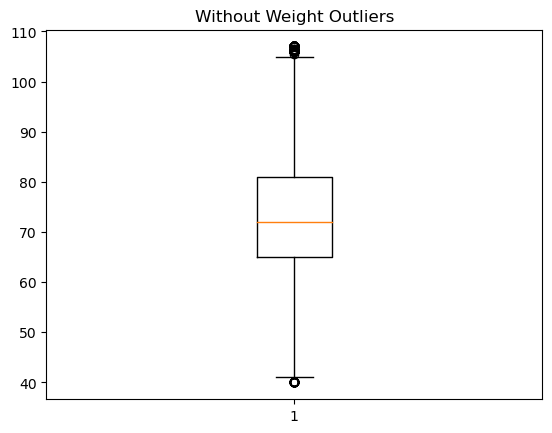

In [89]:
fig1, ax1 = plt.subplots()
ax1.set_title('Without Weight Outliers')
ax1.boxplot(df_without_outliers['weight'])

In [90]:
df_without_outliers = df[(df['weight'] > lower_bound) & (df['weight'] < upper_bound)].reset_index(drop=True)
df = df_without_outliers
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67714,99992,57,1,165,80.0,150,80,1,1,0,0,1,1
67715,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
67716,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
67717,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


Performing outlier detection on the ap_hi column

In [91]:
df['ap_hi'].describe()

count    67719.000000
mean       128.585951
std        156.528328
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [92]:
Q1 = df['ap_hi'].quantile(0.25)
print("Q1 ", Q1)
Q3 = df['ap_hi'].quantile(0.75)
print("Q3 ", Q3)
IQR = Q3 - Q1
print("IQR", IQR)

Q1  120.0
Q3  140.0
IQR 20.0


In [93]:
upper_bound = Q3 + 1.5 * IQR
print("upper ", upper_bound)
lower_bound = Q1 - 1.5 * IQR
print("lower ", lower_bound)

upper  170.0
lower  90.0


In [94]:
df_without_outliers = df[(df['ap_hi'] < upper_bound) & (df['ap_hi'] > lower_bound)]
df_without_outliers

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67713,99991,53,1,172,70.0,130,90,1,1,0,0,1,1
67714,99992,57,1,165,80.0,150,80,1,1,0,0,1,1
67715,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
67717,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1c320602200>,
 'caps': [<matplotlib.lines.Line2D at 0x1c3206027a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c320601ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c320602d40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c320602fb0>],
 'means': []}

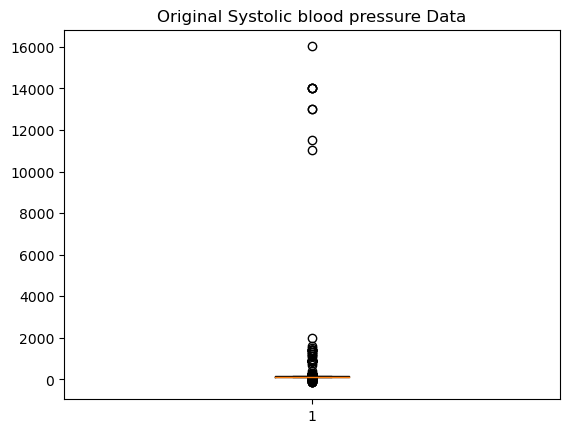

In [95]:
fig1, ax1 = plt.subplots()
ax1.set_title('Original Systolic blood pressure Data')
ax1.boxplot(df['ap_hi'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c320678bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c320679150>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c3206788e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c3206796f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c3206799c0>],
 'means': []}

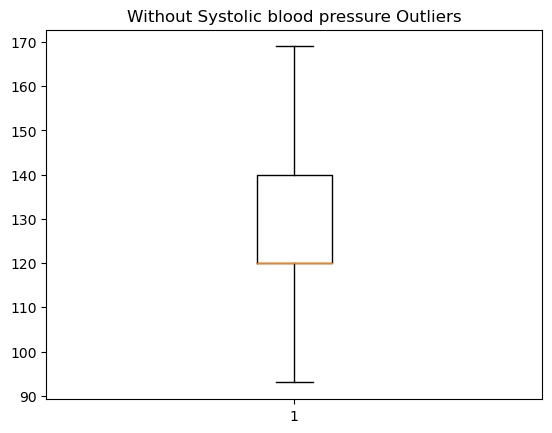

In [96]:
fig1, ax1 = plt.subplots()
ax1.set_title('Without Systolic blood pressure Outliers')
ax1.boxplot(df_without_outliers['ap_hi'])

In [97]:
df_without_outliers = df[(df['ap_hi'] > lower_bound) & (df['ap_hi'] < upper_bound)].reset_index(drop=True)
df = df_without_outliers
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64798,99991,53,1,172,70.0,130,90,1,1,0,0,1,1
64799,99992,57,1,165,80.0,150,80,1,1,0,0,1,1
64800,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
64801,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


Performing outlier detection on the ap_lo column

In [98]:
df['ap_lo'].describe()

count    64803.000000
mean        93.685107
std        181.503375
min          0.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      10000.000000
Name: ap_lo, dtype: float64

In [99]:
Q1 = df['ap_lo'].quantile(0.25)
print("Q1 ", Q1)
Q3 = df['ap_lo'].quantile(0.75)
print("Q3 ", Q3)
IQR = Q3 - Q1
print("IQR", IQR)

Q1  80.0
Q3  90.0
IQR 10.0


In [100]:
upper_bound = Q3 + 1.5 * IQR
print("upper ", upper_bound)
lower_bound = Q1 - 1.5 * IQR
print("lower ", lower_bound)

upper  105.0
lower  65.0


In [101]:
df_without_outliers = df[(df['ap_lo'] < upper_bound) & (df['ap_lo'] > lower_bound)]
df_without_outliers

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
5,8,59,1,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64798,99991,53,1,172,70.0,130,90,1,1,0,0,1,1
64799,99992,57,1,165,80.0,150,80,1,1,0,0,1,1
64800,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
64801,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1c3206c7940>,
 'caps': [<matplotlib.lines.Line2D at 0x1c3206c7ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c3206c7670>],
 'medians': [<matplotlib.lines.Line2D at 0x1c3204b04c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c3204b0790>],
 'means': []}

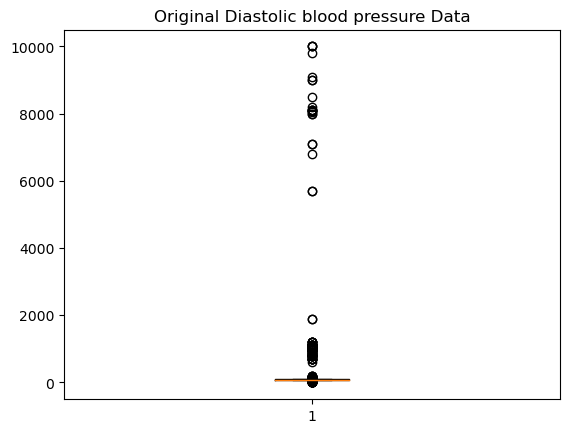

In [102]:
fig1, ax1 = plt.subplots()
ax1.set_title('Original Diastolic blood pressure Data')
ax1.boxplot(df['ap_lo'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c3204fd3c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c3204fd960>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c3204fd0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c3204fdf00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c3204fe1d0>],
 'means': []}

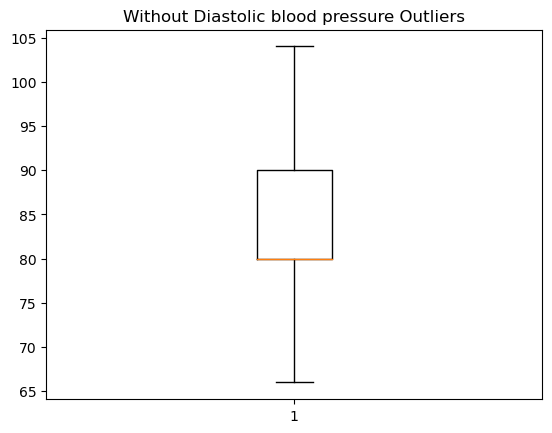

In [103]:
fig1, ax1 = plt.subplots()
ax1.set_title('Without Diastolic blood pressure Outliers')
ax1.boxplot(df_without_outliers['ap_lo'])

In [104]:
df_without_outliers = df[(df['ap_lo'] > lower_bound) & (df['ap_lo'] < upper_bound)].reset_index(drop=True)
df = df_without_outliers
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,8,59,1,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61766,99991,53,1,172,70.0,130,90,1,1,0,0,1,1
61767,99992,57,1,165,80.0,150,80,1,1,0,0,1,1
61768,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
61769,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


## EDA

Non-Modifiable Cause:

Old Age
Heridity
Gender Factor such as Male

Modifiable Cause: 
Alcohol
Smoking
Physical activity


## Univariate 


In [105]:
df.dtypes

id               int64
age              int32
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [106]:
# to understand variables look at their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61771 entries, 0 to 61770
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           61771 non-null  int64  
 1   age          61771 non-null  int32  
 2   gender       61771 non-null  int64  
 3   height       61771 non-null  int64  
 4   weight       61771 non-null  float64
 5   ap_hi        61771 non-null  int64  
 6   ap_lo        61771 non-null  int64  
 7   cholesterol  61771 non-null  int64  
 8   gluc         61771 non-null  int64  
 9   smoke        61771 non-null  int64  
 10  alco         61771 non-null  int64  
 11  active       61771 non-null  int64  
 12  cardio       61771 non-null  int64  
dtypes: float64(1), int32(1), int64(11)
memory usage: 5.9 MB


In [107]:
df['years']=(df['age']/365).round().astype(int)
df['years']

0        0
1        0
2        0
3        0
4        0
        ..
61766    0
61767    0
61768    0
61769    0
61770    0
Name: years, Length: 61771, dtype: int32

In [108]:
df.describe()
#displays statistics such as min, max, mean, std

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.0
mean,49958.487041,52.863123,1.348853,164.421622,73.159013,126.182189,81.651163,1.355863,1.220103,0.086432,0.052015,0.804309,0.491865,0.0
std,28868.135268,6.734729,0.476611,7.526360,12.247023,13.692640,7.566325,0.674082,0.567387,0.281003,0.222058,0.396735,0.499938,0.0
min,0.000000,39.000000,1.000000,143.000000,40.000000,95.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,24888.500000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0
50%,50013.000000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,74893.500000,58.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.0
max,99999.000000,64.000000,2.000000,186.000000,107.000000,169.000000,104.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [109]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

In [128]:
df = pd.DataFrame(features)
cov_matrix=np.cov(df)
cov_matrix
#Covariance shows relationships between different attributes 

array([[ 8.33369234e+08,  7.53660805e+02,  4.24992190e+01,
        -5.98607552e+02, -2.12306473e+02,  1.72549258e+03,
         3.34261984e+02,  1.06361678e+02,  5.60252862e+00,
        -1.37006526e+01, -5.58753217e+00,  5.09712377e+01,
         5.92740527e+01,  0.00000000e+00],
       [ 7.53660805e+02,  4.53565762e+01, -1.04378302e-01,
        -4.82344484e+00,  4.51048362e+00,  1.86098172e+01,
         7.33549595e+00,  6.95447949e-01,  3.64853056e-01,
        -9.15527961e-02, -4.30340896e-02, -2.92304269e-02,
         7.89828712e-01,  0.00000000e+00],
       [ 4.24992190e+01, -1.04378302e-01,  2.27158268e-01,
         1.85278407e+00,  9.20699904e-01,  2.53537447e-01,
         1.59026791e-01, -1.40923931e-02, -6.81569827e-03,
         4.51266589e-02,  1.77939978e-02,  1.37502551e-03,
        -1.44408866e-03,  0.00000000e+00],
       [-5.98607552e+02, -4.82344484e+00,  1.85278407e+00,
         5.66460949e+01,  2.81931867e+01, -1.37429062e+00,
         2.51353513e-01, -3.50495230e-01, -1.

In [129]:
eig_values,eig_vecs= np.linalg.eig(cov_matrix)
eig_vecs,eig_values

(array([[-1.00000000e+00, -1.77198133e-06, -1.37730769e-06,
          7.10645308e-07,  3.54563992e-07, -4.32453224e-07,
          8.05020307e-08, -3.28733849e-09, -3.95245942e-08,
          5.84547023e-08,  4.89781214e-08, -5.97386366e-08,
         -5.03811774e-08,  0.00000000e+00],
        [-9.04354108e-07,  9.87414243e-02,  6.63262405e-02,
         -5.02425234e-01, -8.54892140e-01, -4.77868860e-02,
          1.38935996e-02,  3.51945470e-05, -1.77630567e-03,
          6.75541181e-03,  1.28421637e-03,  6.22037900e-03,
         -3.67723177e-03,  0.00000000e+00],
        [-5.09968645e-08,  3.13170707e-03, -8.89206135e-03,
          2.69997808e-02, -1.68659702e-02, -6.43335976e-04,
          1.71085792e-02,  3.58618564e-02,  3.43332897e-01,
          3.80636134e-02,  1.03827307e-01,  3.97647959e-01,
          8.42073725e-01,  0.00000000e+00],
        [ 7.18298184e-07,  5.76046030e-02, -3.03942084e-01,
          8.11649881e-01, -4.94244937e-01,  2.72054704e-03,
         -9.49284193e-03,  1

## UNIVARIATE

In [142]:
#plt.subplots(figsize=(12,6))
#sns.swarmplot(x=df['age'], y=df['cholesterol'], data=df)

In [143]:
# Count Plot (a.k.a. Bar Plot)
#sns.countplot(x='age', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels

In [144]:
#group data by gender and height , to determine which gender is represented by 1 and 2 
#df.groupby('gender')['height'].mean()

#since gender 2 has a greater average height, 2 represents male 

In [145]:
# Convert the integers to strings
#df['gender'] = df['gender'].astype(str)

# Modify the strings
#df['new_gender'] = df['gender'].str.replace('1', 'Female').str.replace('2','Male')

# Print the updated Series
#df['new_gender']

In [146]:
#create pie chart to show distribution of genders 
#df.new_gender.value_counts(normalize=True).plot.pie()

#Data set is made up predominantly of females

In [147]:
# Distribution Plot (a.k.a. Histogram)
#sns.countplot(x='years', hue='cardio', data = df, palette=pkmn_type_colors);
#indivduals of ges 55 and above from the data set are more likely to have CVD

## BIVARIATE

In [148]:
#df['new_gender'].value_counts()

In [ ]:
pd.crosstab(df['cardio'],df['new_gender'],normalize=True)
#here we can see that the male population is a

In [ ]:
data_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value",col="cardio",data= data_long,kind="count");


In [ ]:
#Calculate correlations
corr = df.corr()
#covariance matrix tell us how one feature varies to the other one 

#Heatmap
sns.heatmap(corr)

From out heatmap, the weight, age and cholestrol seems to have the highest correlation with respect to our target variable(cardio). Is there a correlation between weight, age and cholesterol? Yes there is, being overweight or obese tends to increase bad cholesterol (LDL) and lower good cholesterol (HDL). Getting older also causes LDL cholesterol to rise. 

Cholesterol and glucose has a high correlation, whcih makes sense due to studies whcih has shown that elevated blood glucose levels (any type of diabetes) poses a risk of higher cholesterol, manifesting as diabetic dyslipidemia.

In [ ]:
corr

Calculating the BMI

In [149]:
#df['BMI'] = df['weight']/((df['height']/100)**2)